## Word Cloud

- NAVER 신문 crawling (2020.10.01 ~ 2020.10.31)
- 정치, 경제 분야 title (중복기사 제거)
- Word Cloud
- 멀티프로세스 작업
- **맥 기반에서 작업하여 윈도우에서 실행 시 차이가 있을 수 있습니다**

In [1]:
from IPython.core.display import display

In [21]:
import pandas as pd
from multiprocessing import Pool
import custom_defs

result_list = {'정치':[], '경제':[]}

if __name__ == '__main__':
    pool = Pool(processes=8) # 8개의 프로세스를 사용합니다.
    newspapers = custom_defs.get_newspapers()
    returndata = pool.map(custom_defs.start_parse, list(newspapers))
    pool.close()
    for result in returndata:
        result_list['정치'].extend(result['정치'])
        result_list['경제'].extend(result['경제'])

In [22]:
t1 = pd.Series(result_list['정치'], name='정치')
t2 = pd.Series(result_list['경제'], name='경제')
df = pd.concat([t1,t2], axis=1)
display(df)

df.to_csv('네이버 뉴스.csv', encoding='utf-8-sig', index=False)

,정치,경제
0,"[속보]감사원 “월성 1호기 경제성 평가 낮게 잡혀, 하지만 가동 중단에 대한 평가...",‘네이버’ 없는 ‘네이버 국감’···과방위 정회 소동 [국감 현장]
1,"문대통령 “코로나 백신·치료제 개발, 반드시 끝을 보자”","이재용, 회장직 승계 눈앞…주요 그룹 4050 ‘젊은 총수’ 시대"
2,"속칭 ‘자료상’ 폭탄업체, 가짜 세금계산서 악용해 1조3000억원 세금 탈루 [국감...",“투자금 안 잃을 정도의 지식 필수…돈 벌어 뭘 하고픈지 먼저 고민을” [2030 ...
3,"한국이 개발한 ‘베트남 가스전’, 1달러에 러시아에 팔린다?","현대오일뱅크, 주유소 누유감지 시스템 ‘현대홈즈’ 개발"
4,‘전작권 전환’ 못 풀고…‘방위비 분담금’ 독촉장만 들고 귀국,"정부, ‘전 국민 고용보험’ 위한 TF 발족···연내 로드맵 발표"
...,...,...
105939,NaN,해외직구 전자제품 1위는 음향기기…구매대행 관련 불만 최다
105940,NaN,중앙부처 공무원 승진 소요기간 부처별 최대 4배 격차
105941,NaN,[이 제품이 궁금하다] 덴비 임프레션
105942,NaN,"한난·강원도, 신에너지 개발 위한 상호 협력체계 구축키로"


In [23]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [24]:
import pandas as pd
navernews_df = pd.read_csv('네이버 뉴스.csv')
str_politics = navernews_df['정치'].to_string()
str_economy = navernews_df['경제'].to_string()

In [25]:
# text = open('네이버 뉴스.csv').read()
alice_mask = np.array(Image.open('12주차_한국어분석/alice_mask.png'))
storm_mask = np.array(Image.open('12주차_한국어분석/stormtrooper_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

### matplotlib에 한글폰트 설치

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    matplotlib.rc('font', family='NanumSquare')
    # 유니코드에서  음수 부호설정
    matplotlib.rc('axes', unicode_minus=False)
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

%matplotlib inline

### 정치

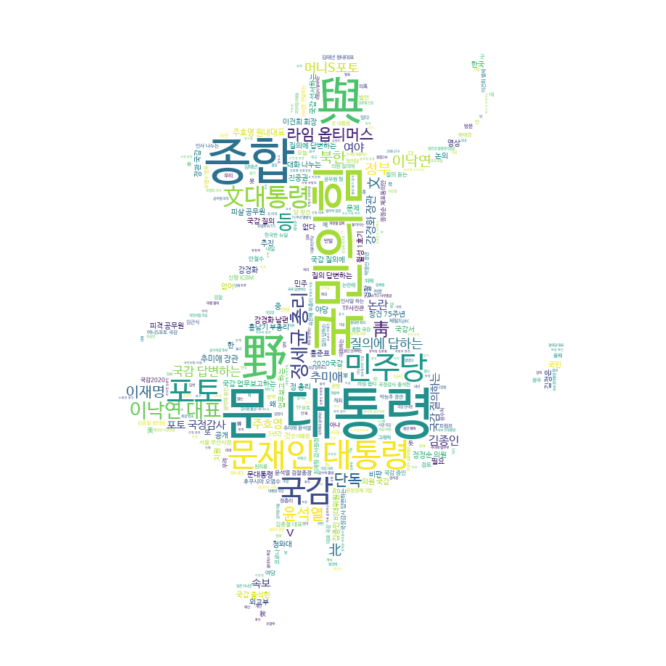

In [27]:
stopwords.add('NaN')

# 여기서도 글꼴 지정해줘야함 (맥에서는)
wc_politics = WordCloud(background_color='white',
               font_path="/Library/Fonts/NanumBarunGothic.ttf",
               max_words=2000,
               mask=alice_mask,
                stopwords = stopwords)

wc_politics = wc_politics.generate(str_politics)
wc_politics.words_ = wc_politics.words_

plt.figure(figsize=(12,12))
plt.imshow(wc_politics, interpolation='bilinear')
plt.axis('off')
plt.show()


## 경제

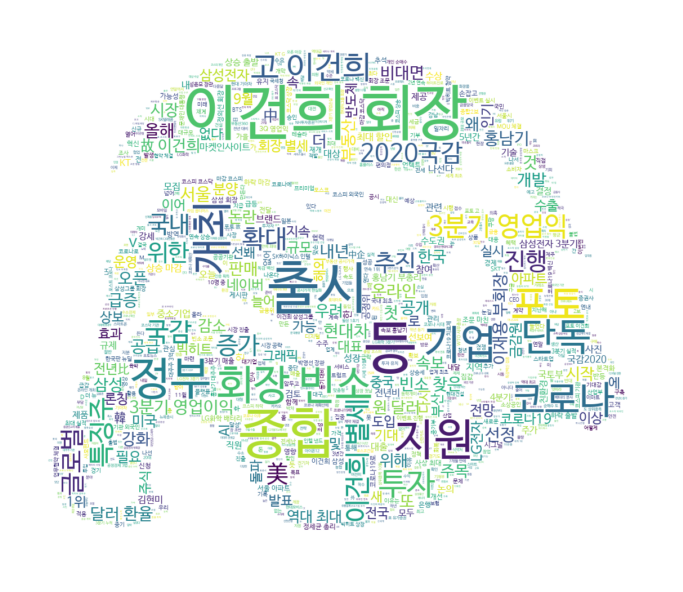

In [28]:
# 여기서도 글꼴 지정해줘야함 (맥에서는)
wc_economy = WordCloud(background_color='white',
               font_path="/Library/Fonts/NanumBarunGothic.ttf",
               max_words=2000,
               mask=storm_mask,
                stopwords = stopwords)

wc_economy = wc_economy.generate(str_economy)
wc_economy.words_ = wc_economy.words_

plt.figure(figsize=(12,12))
plt.imshow(wc_economy, interpolation='bilinear')
plt.axis('off')
plt.show()